## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [51]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [52]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [53]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [54]:
y.backward()

In [7]:
x.grad

tensor([6.])

In [55]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [56]:
# your code here

import torch
torch.cuda.is_available()

def gradient(param):
    x = torch.tensor([param], requires_grad=True)
    y = torch.sigmoid(x) #  y = 1 / (1 + exp(-x))
    y.backward()# Compute gradients of y with respect to x
    return [x.grad, y * (1 - y)]

print(gradient(-1.0))
print(gradient(0.5))


[tensor([0.1966]), tensor([0.1966], grad_fn=<MulBackward0>)]
[tensor([0.2350]), tensor([0.2350], grad_fn=<MulBackward0>)]


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [57]:
# your code here

x1 = torch.tensor([-2.0], requires_grad=True)
x2 = torch.tensor([5.0], requires_grad=True)

y1 = x1
y2 = x2

# Next, we compute the gradient of y1, y2 with respect to x1, x2
y1.backward()
y2.backward()

# And we print the gradients of x
print(x1.grad.item())
print(x2.grad.item())

# The linear function is f(x)=x so its derivatie it's f'(x)=1. The gradient of the points must be 1.

1.0
1.0


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [58]:
# your code here

# We define ReLU function
def ReLU(x):
    return max(0,x)

def reluDerivative(x):
    if x > 0:
        return 1
    return 0

In [59]:
x1 = torch.tensor([8.0], requires_grad=True)
x2 = torch.tensor([4.0], requires_grad=True)

y1 = ReLU(x1)
y2 = ReLU(x2)

# Next, we compute the gradient of y1, y2 with respect to x1, x2
y1.backward()
y2.backward()

# And we print the gradients of x
explicit_x1 = reluDerivative(x1)
explicit_x2 = reluDerivative(x2)

print("Gradient of sigmoid at x=8 using PyTorch: ", x1.grad.item())
print("Gradient of sigmoid at x=8 using explicit formula: ", explicit_x1)
print()
print("Gradient of sigmoid at x=4 using Pytorch: ", x2.grad.item())
print("Gradient of sigmoid at x=4 using explicit formula: ", explicit_x2)

Gradient of sigmoid at x=8 using PyTorch:  1.0
Gradient of sigmoid at x=8 using explicit formula:  1

Gradient of sigmoid at x=4 using Pytorch:  1.0
Gradient of sigmoid at x=4 using explicit formula:  1


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

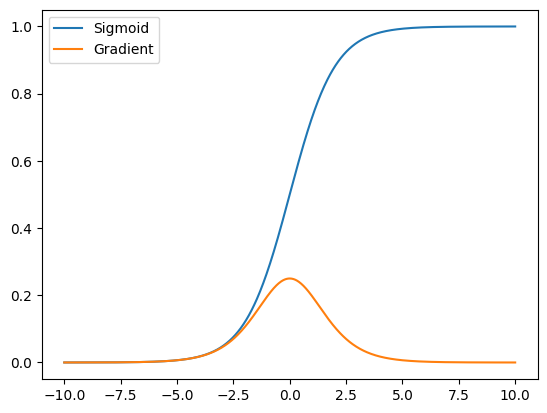

In [60]:
# your code here
import torch
import matplotlib.pyplot as plt
torch.cuda.is_available()

#torch.linspace creates a tensor with values between start and end,
# with a given number of steps

x = torch.linspace(-10, 10, 1000, requires_grad=True)
y = torch.sigmoid(x) # 1/(1+exp(-x))
plt.plot(x.detach().numpy(), y.detach().numpy(), label='Sigmoid')

new_x = x.tensor_split(1)
gradient = torch.gradient(y, spacing=new_x)
plt.plot(x.detach().numpy(), gradient[0].detach().numpy(), label='Gradient')
plt.legend()
plt.show()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

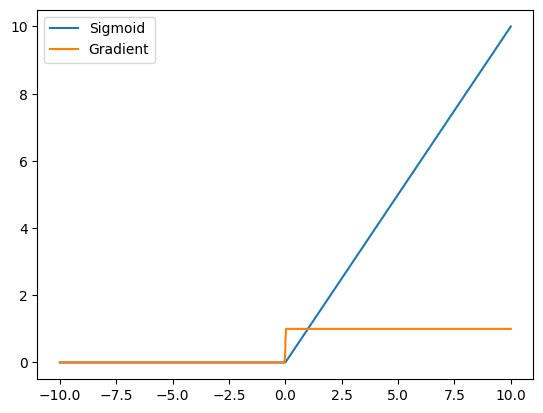

In [61]:
# your code here
import torch
import matplotlib.pyplot as plt
torch.cuda.is_available()

x = torch.linspace(-10, 10, 1000, requires_grad=True)
y = torch.relu(x) # max(0, x)
plt.plot(x.detach().numpy(), y.detach().numpy(), label='Sigmoid')

new_x = x.tensor_split(1) # replace negative values with 0 and leave positive values unchanged
gradient = torch.gradient(y, spacing=new_x)
plt.plot(x.detach().numpy(), gradient[0].detach().numpy(), label='Gradient')
plt.legend()
plt.show()  

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

In [70]:
# your code here
import numpy as np
# tahn(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)) = 1-tanh(x)**2
def tanh(x): #generate output between [-1,1]
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [63]:
# Next we define its derivative
def tanhDerivative(x):
#    return 2*np.exp(-x) / (np.exp(x) + np.exp(-x))**2
    return 1-tanh(x)**2

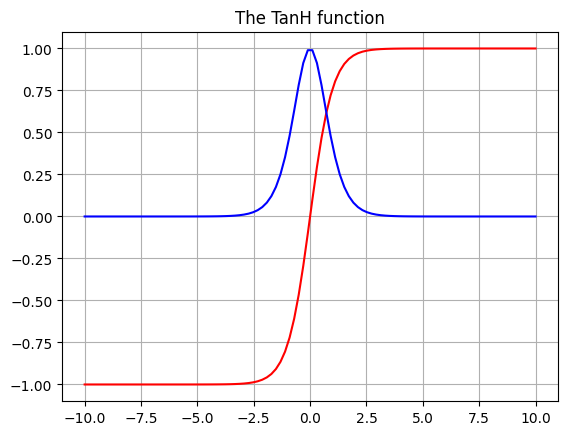

In [72]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

plt.title("The TanH function")
plt.grid()

plt.plot(x, tanh(x), 'r')
plt.plot(y, tanhDerivative(y), 'b')

plt.show()

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

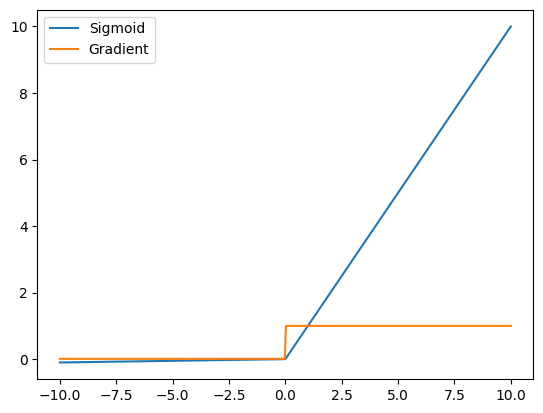

In [65]:
# your code here
import torch
import matplotlib.pyplot as plt
torch.cuda.is_available()

x = torch.linspace(-10, 10, 1000, requires_grad=True)
y = torch.nn.functional.leaky_relu(x) #apply leaky relu function to input x
plt.plot(x.detach().numpy(), y.detach().numpy(), label='Sigmoid') 

new_x = x.tensor_split(1)
gradient = torch.gradient(y, spacing=new_x)
plt.plot(x.detach().numpy(), gradient[0].detach().numpy(), label='Gradient')
plt.legend()
plt.show()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [66]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [67]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.5936], grad_fn=<SigmoidBackward0>)


In [68]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    prediction = perceptron(input_data)
    loss = criterion(prediction, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5977
Epoch [200/1000], Loss: 0.5883
Epoch [300/1000], Loss: 0.5865
Epoch [400/1000], Loss: 0.5861
Epoch [500/1000], Loss: 0.5860
Epoch [600/1000], Loss: 0.5859
Epoch [700/1000], Loss: 0.5859
Epoch [800/1000], Loss: 0.5859
Epoch [900/1000], Loss: 0.5859
Epoch [1000/1000], Loss: 0.5859


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [69]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__() # calls the constructor of the Module class
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        x = self.linear(x)
        return x

perceptron = Perceptron(input_size, output_size)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()                              # calculates the loss between the output and the target
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)    # optimizer that implements stochastic gradient descent

# Generate OR data.
input_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]]).float()
labels = torch.tensor([[0], [1], [1], [1]]).float()

# Train the model
num_epochs = 10000
for epoch in range(num_epochs):
    # make the prediction and the loss
    prediction = perceptron(input_data)
    loss = criterion(prediction, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward() #  makes the derivative of the loss with respect to the parameters
    optimizer.step() #optimizer updates the parameters

    # Print the loss every 100 epochs
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [500/10000], Loss: 0.1499
Epoch [1000/10000], Loss: 0.0875
Epoch [1500/10000], Loss: 0.0609
Epoch [2000/10000], Loss: 0.0464
Epoch [2500/10000], Loss: 0.0374
Epoch [3000/10000], Loss: 0.0312
Epoch [3500/10000], Loss: 0.0268
Epoch [4000/10000], Loss: 0.0234
Epoch [4500/10000], Loss: 0.0208
Epoch [5000/10000], Loss: 0.0187
Epoch [5500/10000], Loss: 0.0170
Epoch [6000/10000], Loss: 0.0156
Epoch [6500/10000], Loss: 0.0144
Epoch [7000/10000], Loss: 0.0133
Epoch [7500/10000], Loss: 0.0124
Epoch [8000/10000], Loss: 0.0116
Epoch [8500/10000], Loss: 0.0109
Epoch [9000/10000], Loss: 0.0103
Epoch [9500/10000], Loss: 0.0098
Epoch [10000/10000], Loss: 0.0093
